# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

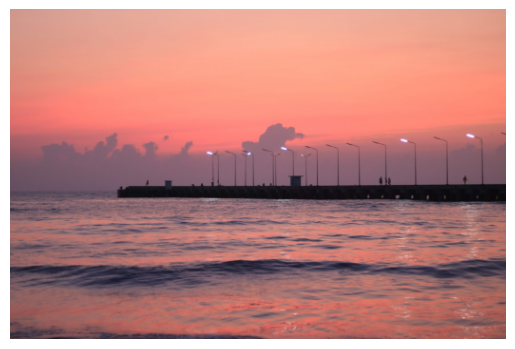

In [2]:
### START CODE HERE ###
# img = cv2.imread('images/test.png')
img = cv2.imread('images/3.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [3]:
### START CODE HERE ###
def plot_histogram(image):
    # Split the image into channels
    channels = cv2.split(image)
    
    # Define histogram parameters
    hist_size = [256]  # Number of bins (one for each intensity level)
    ranges = [0, 256]  # Range of pixel intensities (0 to 255)

    # Calculate the histogram for each color channel
    hist = []
    for channel in channels:
        hist.append(cv2.calcHist([channel], [0], None, hist_size, ranges))
    
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

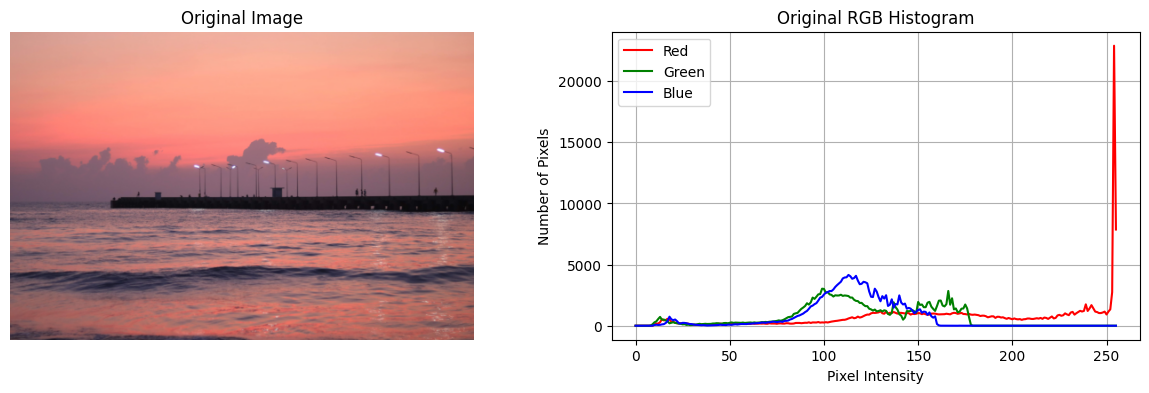

In [4]:
### START CODE HERE ###

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

axs[0].imshow(img)
axs[0].set_title('Original Image')
axs[0].axis('off')

hist = plot_histogram(img)
# Plot the histograms
axs[1].set_title("Original RGB Histogram")
axs[1].plot(hist[0], color='r', label='Red')
axs[1].plot(hist[1], color='g', label='Green')
axs[1].plot(hist[2], color='b', label='Blue')
axs[1].set_xlabel("Pixel Intensity")
# axs[1].set_xlim([0, 255])  # Set x-axis range to match the histogram bins
# axs[1].set_xticks(range(0, 256, 50))  # Set x-axis ticks every 50 units
axs[1].set_ylabel("Number of Pixels")
axs[1].grid(True)
axs[1].legend()
plt.show()

### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

In [5]:
def equalize_image(image):
  # Split the image into channels
  channels = cv2.split(image)

  # Equalize histogram for each channel
  equalized_channels = []
  for channel in channels:
      equalized_channels.append(cv2.equalizeHist(channel))

  # Merge equalized channels back into BGR image
  image_eq = cv2.merge(equalized_channels)

  return image_eq

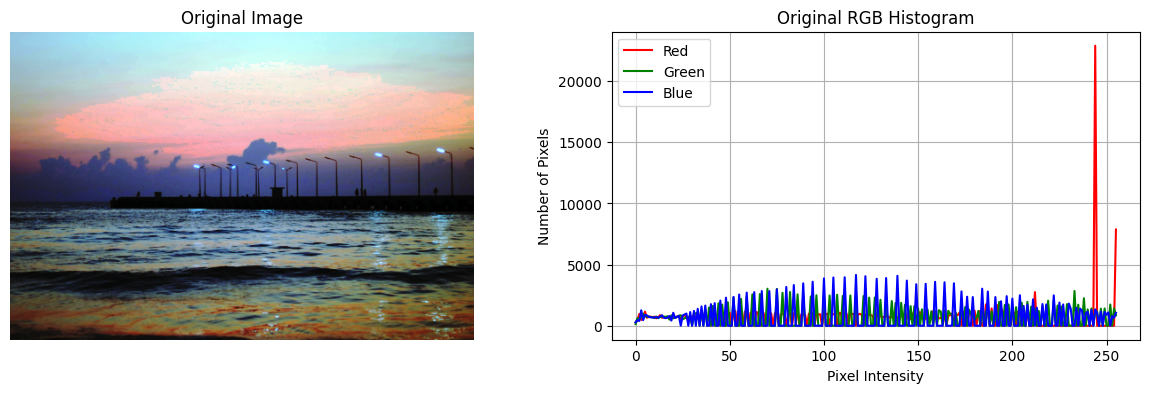

In [6]:
### START CODE HERE ###
fig, axs = plt.subplots(1, 2, figsize=(15, 4))

equalized_image = equalize_image(img)

axs[0].imshow(equalized_image)
axs[0].set_title('Original Image')
axs[0].axis('off')

hist = plot_histogram(equalized_image)
# Plot the histograms
axs[1].set_title("Original RGB Histogram")
axs[1].plot(hist[0], color='r', label='Red')
axs[1].plot(hist[1], color='g', label='Green')
axs[1].plot(hist[2], color='b', label='Blue')
axs[1].set_xlabel("Pixel Intensity")
# axs[1].set_xlim([0, 255])  # Set x-axis range to match the histogram bins
# axs[1].set_xticks(range(0, 256, 50))  # Set x-axis ticks every 50 units
axs[1].set_ylabel("Number of Pixels")
axs[1].grid(True)
axs[1].legend()
plt.show()
 
### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

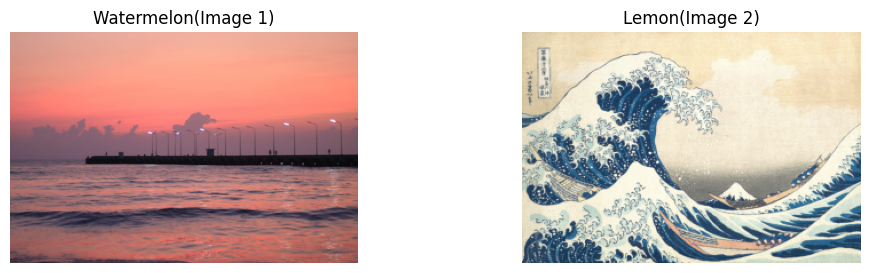

In [7]:
### START CODE HERE ###
img1 = cv2.imread('images/3.png')
img2 = cv2.imread('images/2.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 2, figsize=(12, 3))

axs[0].imshow(img1)
axs[0].set_title('Watermelon(Image 1)')
axs[0].axis('off')


axs[1].imshow(img2)
axs[1].set_title('Lemon(Image 2)')
axs[1].axis('off')
plt.show()
### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

In [8]:
def compute_pdf_cdf(hist):
    pdf, cdf = [],[]
    for channel in range(len(hist)):
        pdf.append(hist[channel] / np.sum(hist[channel]))
        cdf.append(np.cumsum(pdf[channel]))
    return pdf, cdf

In [9]:
def plot_image_pdf_cdf(image, title_name):

    # Compute PDF and CDF
    hist = plot_histogram(image)
    pdf_img, cdf_img = compute_pdf_cdf(hist)
    
    # Create figure and subplots
    fig, axs = plt.subplots(1, 3, figsize=(13, 4))

    # Plot Image
    axs[0].imshow(image)
    axs[0].set_title(f'{title_name}')
    axs[0].axis('off')
    
    # Plot PDFs
    axs[1].plot(pdf_img[0], color='r', label='Red')
    axs[1].plot(pdf_img[1], color='g', label='Green')
    axs[1].plot(pdf_img[2], color='b', label='Blue')
    axs[1].set_title('PDF')
    axs[1].set_xlabel("Pixel Intensity")
    axs[1].set_ylabel("Probability Density")
    axs[1].grid(True)
    axs[1].legend()
    
    # Plot CDFs
    axs[2].plot(cdf_img[0], color='r', label='Red')
    axs[2].plot(cdf_img[1], color='g', label='Green')
    axs[2].plot(cdf_img[2], color='b', label='Blue')
    axs[2].set_title('CDF')
    axs[2].set_xlabel("Pixel Intensity")
    axs[2].set_ylabel("Cumulative Probability")
    axs[2].grid(True)
    axs[2].legend()
    
    plt.tight_layout(pad=2.0)  
    # Display the plot
    plt.show()

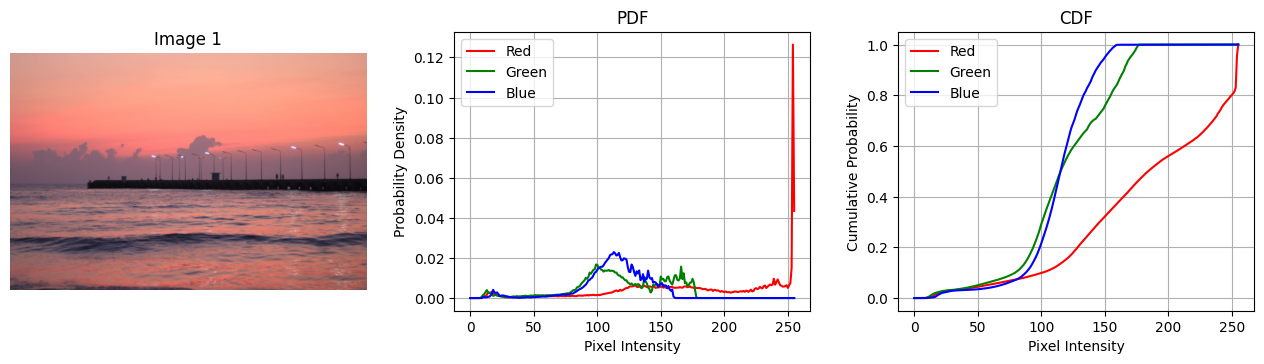

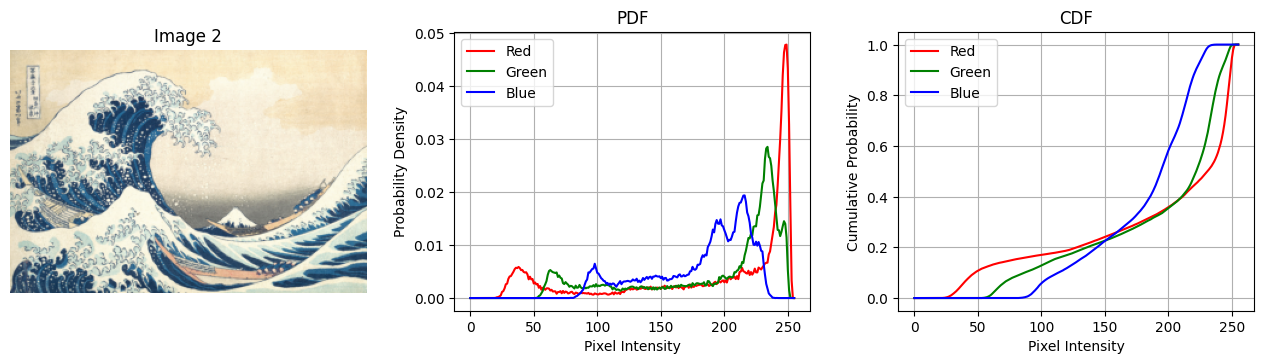

In [10]:
image_paths = [img1, img2]

for i, img in enumerate(image_paths):
    plot_image_pdf_cdf(img, f"Image {i+1}")

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

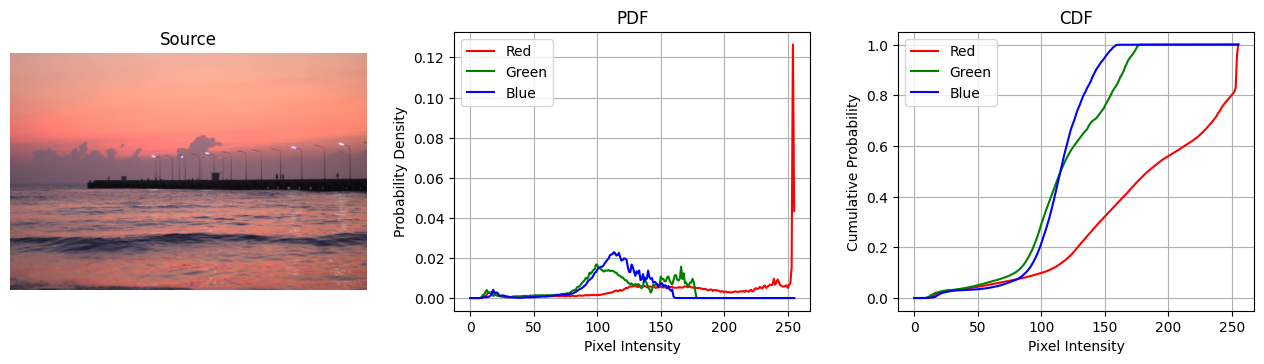

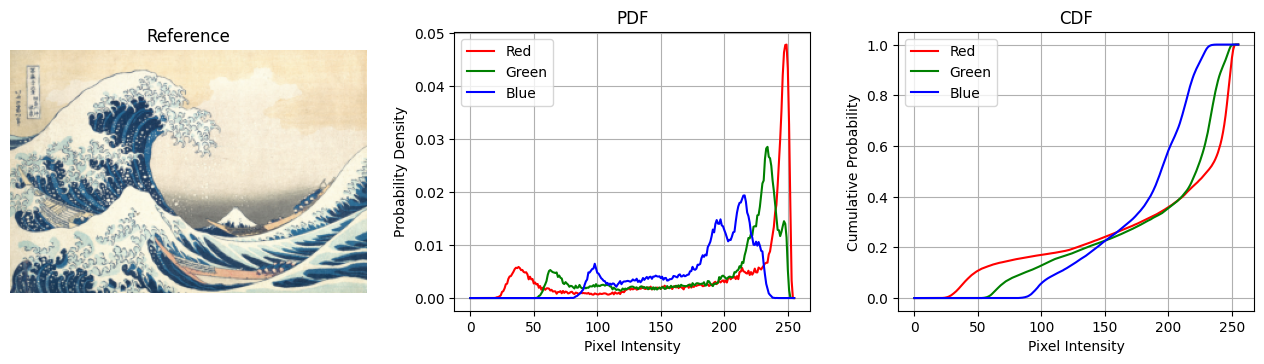

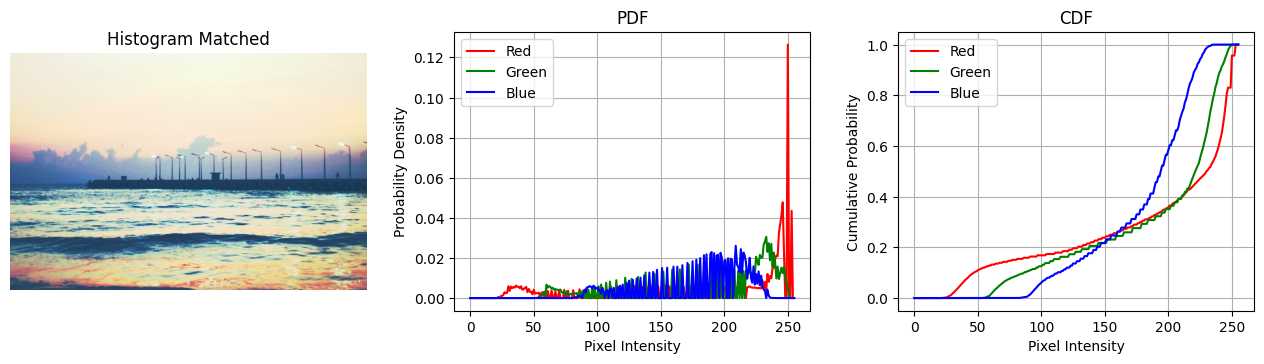

In [11]:
### START CODE HERE ###
from skimage.exposure import match_histograms

matched = match_histograms(img1, img2, channel_axis=-1)

plot_image_pdf_cdf(img1, "Source")
plot_image_pdf_cdf(img2, "Reference")
plot_image_pdf_cdf(matched, "Histogram Matched")

### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?